# Importing libraries

In [1]:
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Fetching USGS historical data

In [2]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2022-09-25&endtime=2022-11-01'
json_obj = urlopen(url)
data = json.load(json_obj)
df = pd.json_normalize(data, record_path=['features'])

In [3]:
df

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,ak022dz5ezb8,2.30,"63 km W of Tyonek, Alaska",1667260716194,1669607803040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.5100,NaN,ml,earthquake,"M 2.3 - 63 km W of Tyonek, Alaska",Point,"[-152.3132, 61.0899, 108.7]"
1,Feature,nn00850374,0.30,"7 km SE of Floriston, California",1667260472434,1667270651978,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",3.0,0.07900,0.0788,226.06,ml,earthquake,"M 0.3 - 7 km SE of Floriston, California",Point,"[-119.9603, 39.3451, 4.9]"
2,Feature,ak022dz5c5id,1.90,"79 km SSE of Akutan, Alaska",1667259916210,1668732379864,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.4400,NaN,ml,earthquake,"M 1.9 - 79 km SSE of Akutan, Alaska",Point,"[-165.2668, 53.4852, 40.5]"
3,Feature,us7000imi4,4.20,"111 km SSE of Pondaguitan, Philippines",1667259806755,1668493027040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",16.0,1.90900,0.4300,171.00,mb,earthquake,"M 4.2 - 111 km SSE of Pondaguitan, Philippines",Point,"[126.631, 5.4618, 67.437]"
4,Feature,hv73202792,2.01,"8 km E of P?hala, Hawaii",1667259381950,1667259569090,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",38.0,NaN,0.1200,162.00,md,earthquake,"M 2.0 - 8 km E of P?hala, Hawaii",Point,"[-155.397994995117, 19.1886672973633, 32.04999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15737,Feature,pr71372933,2.50,"2 km SSW of Guánica, Puerto Rico",1664065078460,1664065992230,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",8.0,NaN,0.1700,224.00,md,earthquake,"M 2.5 - 2 km SSW of Guánica, Puerto Rico",Point,"[-66.9141666666667, 17.948, 13.03]"
15738,Feature,ak022cb84rnj,1.50,"38 km ESE of Chenega, Alaska",1664065073596,1666720823709,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.3700,NaN,ml,earthquake,"M 1.5 - 38 km ESE of Chenega, Alaska",Point,"[-147.363, 59.9577, 19.7]"
15739,Feature,nn00847903,1.60,"58 km N of Indian Springs, Nevada",1664064640213,1664136010025,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",16.0,0.15000,0.1349,264.66,ml,earthquake,"M 1.6 - 58 km N of Indian Springs, Nevada",Point,"[-115.7666, 37.094, 8.7]"
15740,Feature,nc73785571,0.91,"8km WNW of Cobb, CA",1664064584690,1664206121946,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",nearby-cities,origin,phase-data,scitech-link,",23.0,0.01395,0.0300,54.00,md,earthquake,"M 0.9 - 8km WNW of Cobb, CA",Point,"[-122.808, 38.8405, 2.39]"


# Transforming data

In [26]:
df['properties.tsunami'].value_counts()*100/len(df)

0    99.892009
1     0.107991
Name: properties.tsunami, dtype: float64

In [3]:
df = df[['properties.time', 'properties.place', 'properties.mag', 'properties.magType', 'geometry.coordinates', 'properties.tsunami']]

df.rename(columns={'properties.time' : 'time',
                          'properties.place' : 'place',
                          'properties.mag' : 'mag',
                          'properties.magType' : 'magType',
                          'geometry.coordinates' : 'coordinates',
                          'properties.tsunami' : 'tsunami'}, inplace=True)

df_locations = pd.DataFrame(df["coordinates"].to_list(), columns=['longitude', 'latitude', 'depth'])
df['latitude'] = df_locations.latitude
df['longitude'] = df_locations.longitude
df['depth'] = df_locations.depth
df.drop(columns='coordinates', inplace=True)

df.time = pd.to_datetime(df.time, unit='ms')

## Final dataframe

In [57]:
df

,time,place,mag,magType,tsunami,latitude,longitude,depth
0,2022-10-31 23:58:36.194,"63 km W of Tyonek, Alaska",2.30,ml,0,61.089900,-152.313200,108.700000
1,2022-10-31 23:54:32.434,"7 km SE of Floriston, California",0.30,ml,0,39.345100,-119.960300,4.900000
2,2022-10-31 23:45:16.210,"79 km SSE of Akutan, Alaska",1.90,ml,0,53.485200,-165.266800,40.500000
3,2022-10-31 23:43:26.755,"111 km SSE of Pondaguitan, Philippines",4.20,mb,0,5.461800,126.631000,67.437000
4,2022-10-31 23:36:21.950,"8 km E of P?hala, Hawaii",2.01,md,0,19.188667,-155.397995,32.049999
...,...,...,...,...,...,...,...,...
15739,2022-09-25 00:17:58.460,"2 km SSW of Guánica, Puerto Rico",2.50,md,0,17.948000,-66.914167,13.030000
15740,2022-09-25 00:17:53.596,"38 km ESE of Chenega, Alaska",1.50,ml,0,59.957700,-147.363000,19.700000
15741,2022-09-25 00:10:40.213,"58 km N of Indian Springs, Nevada",1.60,ml,0,37.094000,-115.766600,8.700000
15742,2022-09-25 00:09:44.690,"8km WNW of Cobb, CA",0.91,md,0,38.840500,-122.808000,2.390000


# Fetching significant earthquake historical data

In [4]:
df_sig = pd.read_csv('Significant-Earthquake-Database.csv')

In [13]:
df_sig[df_sig['Focal Depth'].isna()] # The rows with no depth have no use for the model so we'll drop them

,ID,Date,Country,Location,Latitude,Longitude,Focal Depth,Class_Depth,Primary Magnitude,Class_Mag,Intensity,Deaths,Death Description,Damage (in M$),Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description,Tsunami
14,5950,NaN,JAPAN,"SEIONAIKAI, JAPAN",34.60,135.40,NaN,NaN,6.7,Strong,NaN,0.0,NaN,0.50,LIMITED (roughly corresponding to less than $1...,0.0,NaN,0.0,NaN,1.0
15,6019,NaN,JAPAN,"BOSO, JAPAN",35.20,140.60,NaN,NaN,6.7,Strong,NaN,0.0,NaN,0.00,NaN,0.0,NaN,0.0,NaN,1.0
16,1176,1707-10-28,JAPAN,JAPAN: ENSHUNADA,34.10,137.80,NaN,NaN,8.4,Great,NaN,0.0,NaN,0.00,NaN,0.0,NaN,0.0,NaN,1.0
17,1730,1829-09-26,CHILE,CHILE: VALPARAISO,-33.05,-71.63,NaN,NaN,7.0,Major,11.0,9.0,Few (~1 to 50 deaths),0.50,LIMITED (roughly corresponding to less than $1...,0.0,NaN,0.0,NaN,0.0
18,10008,1868-08-14,CHILE,CHILE: ARICA,-18.60,-71.00,NaN,NaN,8.5,Great,NaN,0.0,NaN,0.00,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,1315,1751-05-20,JAPAN,JAPAN: HONSHU: NW,37.20,138.10,NaN,NaN,6.6,Strong,NaN,2100.0,Very Many (~1001 or more deaths),4900.00,EXTREME (~$25 million or more),9100.0,Very Many (~1001 or more houses),0.0,NaN,1.0
576,1566,1804-07-10,JAPAN,JAPAN: KISAKATA,39.05,139.95,NaN,NaN,7.3,Major,NaN,450.0,Many (~101 to 1000 deaths),4900.00,EXTREME (~$25 million or more),10810.0,Very Many (~1001 or more houses),0.0,NaN,1.0
577,2195,1872-03-26,USA,CALIFORNIA: OWENS VALLEY,36.70,-118.10,NaN,NaN,7.8,Major,10.0,27.0,Few (~1 to 50 deaths),0.25,LIMITED (roughly corresponding to less than $1...,52.0,Some (~51 to 100 houses),0.0,NaN,1.0
580,2534,1898-04-22,JAPAN,JAPAN: SANRIKU,38.60,142.00,NaN,NaN,7.2,Major,NaN,0.0,NaN,11.00,SEVERE (~>$5 to $24 million),402.0,Many (~101 to 1000 houses),0.0,NaN,1.0


In [5]:
no_depth = df_sig[df_sig['Focal Depth'].isna()].index
df_sig.drop(no_depth, inplace=True)

# Defining features

In [6]:
df['year'] = df.time.dt.year # Creating a year feature
df['month'] = df.time.dt.month # Creating a month feature
df.drop(columns=['time'], inplace=True) 
df[['km', 'location']] = df['place'].str.split(',', 1, expand=True) # spliting the region from the aproximate location
df.location.fillna(df.km[df.km.str.contains('km') == False], inplace=True) # Filling the locations that didn't had km aproximations
no_location = df[df.location.isna()].index
df.drop(no_location, inplace=True)
df.drop(columns=['place'], inplace=True)

C:\Users\Auli\AppData\Local\Temp\ipykernel_848\2609901823.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['km', 'location']] = df['place'].str.split(',', 1, expand=True) # spliting the region from the aproximate location


Features to use

In [59]:
df

,mag,magType,tsunami,latitude,longitude,depth,year,month,km,location
0,2.30,ml,0,61.089900,-152.313200,108.700000,2022,10,63 km W of Tyonek,Alaska
1,0.30,ml,0,39.345100,-119.960300,4.900000,2022,10,7 km SE of Floriston,California
2,1.90,ml,0,53.485200,-165.266800,40.500000,2022,10,79 km SSE of Akutan,Alaska
3,4.20,mb,0,5.461800,126.631000,67.437000,2022,10,111 km SSE of Pondaguitan,Philippines
4,2.01,md,0,19.188667,-155.397995,32.049999,2022,10,8 km E of P?hala,Hawaii
...,...,...,...,...,...,...,...,...,...,...
15739,2.50,md,0,17.948000,-66.914167,13.030000,2022,9,2 km SSW of Guánica,Puerto Rico
15740,1.50,ml,0,59.957700,-147.363000,19.700000,2022,9,38 km ESE of Chenega,Alaska
15741,1.60,ml,0,37.094000,-115.766600,8.700000,2022,9,58 km N of Indian Springs,Nevada
15742,0.91,md,0,38.840500,-122.808000,2.390000,2022,9,8km WNW of Cobb,CA


In [7]:
df.location.replace(' ', '', inplace=True)
df.location.replace(' CA', 'California', inplace=True)
df.location.fillna(df.km[df.km.str.contains('km') == False], inplace=True)
no_location = df[df.location.isna()].index
df.drop(no_location, inplace=True)

In [152]:
df.location.isna().sum()*100/len(df)

0.0

In [8]:
df.drop(columns=['km', 'magType'], inplace=True)

In [9]:
df.depth = round(df.depth,1)

In [10]:
df

,mag,tsunami,latitude,longitude,depth,year,month,location
0,2.30,0,61.089900,-152.313200,108.7,2022,10,Alaska
1,0.30,0,39.345100,-119.960300,4.9,2022,10,California
2,1.90,0,53.485200,-165.266800,40.5,2022,10,Alaska
3,4.20,0,5.461800,126.631000,67.4,2022,10,Philippines
4,2.01,0,19.188667,-155.397995,32.0,2022,10,Hawaii
...,...,...,...,...,...,...,...,...
15741,2.50,0,17.948000,-66.914167,13.0,2022,9,Puerto Rico
15742,1.50,0,59.957700,-147.363000,19.7,2022,9,Alaska
15743,1.60,0,37.094000,-115.766600,8.7,2022,9,Nevada
15744,0.91,0,38.840500,-122.808000,2.4,2022,9,California


In [11]:
df.rename(columns={'location' : 'place'}, inplace=True)

In [29]:
df_sig.columns

Index(['ID', 'Date', 'Country', 'Location', 'Latitude', 'Longitude',
       'Focal Depth', 'Class_Depth', 'Primary Magnitude', 'Class_Mag',
       'Intensity', 'Deaths', 'Death Description', 'Damage (in M$)',
       'Damage Description', 'Houses Destroyed',
       'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Tsunami'],
      dtype='object')

In [12]:
df_sig = df_sig[['Date','Location', 'Latitude', 'Longitude',
       'Focal Depth','Primary Magnitude','Tsunami']]

In [13]:
df_sig[['location', 'region']] = df_sig['Location'].str.split(':', 1, expand=True)

C:\Users\Auli\AppData\Local\Temp\ipykernel_848\3423144483.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_sig[['location', 'region']] = df_sig['Location'].str.split(':', 1, expand=True)


In [14]:
df_sig.Date = pd.to_datetime(df_sig.Date)
df_sig['year'] = df_sig.Date.dt.year 
df_sig['month'] = df_sig.Date.dt.month 

In [15]:
df_sig.drop(columns=['region','Location', 'Date'], inplace=True)
df_sig.location = df_sig.location.str.title()
df_sig.rename(columns={'Tsunami' : 'tsunami',
                        'Primary Magnitude' : 'mag',
                        'Focal Depth' : 'depth',
                        'Latitude' : 'latitude',
                        'Longitude' : 'longitude',
                        'location' : 'place'}, inplace=True)

In [16]:
df_sig

,latitude,longitude,depth,mag,tsunami,place,year,month
0,-30.500,-71.800,39.0,6.6,1.0,Chile,1972,6
1,37.600,-118.840,7.0,6.1,0.0,California,1980,5
2,33.133,-115.650,6.0,6.0,0.0,California,1981,4
3,19.362,-155.083,9.0,6.1,1.0,Hawaiian Islands,1989,6
4,37.634,137.245,11.0,6.3,1.0,Japan,1993,2
...,...,...,...,...,...,...,...,...
589,38.452,-87.886,14.0,5.3,0.0,Illinois,2008,4
590,36.158,141.521,39.0,6.8,0.0,Japan,2008,5
591,38.058,144.590,19.0,7.6,0.0,Japan,2011,3
592,-31.573,-71.674,22.0,8.3,1.0,Chile,2015,9


In [17]:
df_sig = df_sig[['mag', 'depth', 'place', 'year', 'month', 'latitude', 'longitude', 'tsunami']]

In [18]:
df_sig

,mag,depth,place,year,month,latitude,longitude,tsunami
0,6.6,39.0,Chile,1972,6,-30.500,-71.800,1.0
1,6.1,7.0,California,1980,5,37.600,-118.840,0.0
2,6.0,6.0,California,1981,4,33.133,-115.650,0.0
3,6.1,9.0,Hawaiian Islands,1989,6,19.362,-155.083,1.0
4,6.3,11.0,Japan,1993,2,37.634,137.245,1.0
...,...,...,...,...,...,...,...,...
589,5.3,14.0,Illinois,2008,4,38.452,-87.886,0.0
590,6.8,39.0,Japan,2008,5,36.158,141.521,0.0
591,7.6,19.0,Japan,2011,3,38.058,144.590,0.0
592,8.3,22.0,Chile,2015,9,-31.573,-71.674,1.0


In [19]:
df = df[['mag', 'depth', 'place', 'year', 'month', 'latitude', 'longitude', 'tsunami']]

In [20]:
df

,mag,depth,place,year,month,latitude,longitude,tsunami
0,2.30,108.7,Alaska,2022,10,61.089900,-152.313200,0
1,0.30,4.9,California,2022,10,39.345100,-119.960300,0
2,1.90,40.5,Alaska,2022,10,53.485200,-165.266800,0
3,4.20,67.4,Philippines,2022,10,5.461800,126.631000,0
4,2.01,32.0,Hawaii,2022,10,19.188667,-155.397995,0
...,...,...,...,...,...,...,...,...
15741,2.50,13.0,Puerto Rico,2022,9,17.948000,-66.914167,0
15742,1.50,19.7,Alaska,2022,9,59.957700,-147.363000,0
15743,1.60,8.7,Nevada,2022,9,37.094000,-115.766600,0
15744,0.91,2.4,California,2022,9,38.840500,-122.808000,0


In [21]:
df_merged = df.append(df_sig, ignore_index=True)

C:\Users\Auli\AppData\Local\Temp\ipykernel_848\2218702514.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = df.append(df_sig, ignore_index=True)


## Merged dataframe to use

In [22]:
df_merged

,mag,depth,place,year,month,latitude,longitude,tsunami
0,2.30,108.7,Alaska,2022,10,61.089900,-152.313200,0.0
1,0.30,4.9,California,2022,10,39.345100,-119.960300,0.0
2,1.90,40.5,Alaska,2022,10,53.485200,-165.266800,0.0
3,4.20,67.4,Philippines,2022,10,5.461800,126.631000,0.0
4,2.01,32.0,Hawaii,2022,10,19.188667,-155.397995,0.0
...,...,...,...,...,...,...,...,...
15719,5.30,14.0,Illinois,2008,4,38.452000,-87.886000,0.0
15720,6.80,39.0,Japan,2008,5,36.158000,141.521000,0.0
15721,7.60,19.0,Japan,2011,3,38.058000,144.590000,0.0
15722,8.30,22.0,Chile,2015,9,-31.573000,-71.674000,1.0


In [45]:
df_merged.isna().sum()*100/len(df_merged) # Some missing values in mag field, but since are only one column we'll drop it

mag          0.006362
depth        0.000000
place        0.000000
month        0.000000
latitude     0.000000
longitude    0.000000
tsunami      0.000000
dtype: float64

In [23]:
no_mag = df_merged[df_merged.mag.isna()].index
df_merged.drop(no_mag, inplace=True)

# Preprocessing

## Visualization

In [24]:
df_merged

,mag,depth,place,year,month,latitude,longitude,tsunami
0,2.30,108.7,Alaska,2022,10,61.089900,-152.313200,0.0
1,0.30,4.9,California,2022,10,39.345100,-119.960300,0.0
2,1.90,40.5,Alaska,2022,10,53.485200,-165.266800,0.0
3,4.20,67.4,Philippines,2022,10,5.461800,126.631000,0.0
4,2.01,32.0,Hawaii,2022,10,19.188667,-155.397995,0.0
...,...,...,...,...,...,...,...,...
15719,5.30,14.0,Illinois,2008,4,38.452000,-87.886000,0.0
15720,6.80,39.0,Japan,2008,5,36.158000,141.521000,0.0
15721,7.60,19.0,Japan,2011,3,38.058000,144.590000,0.0
15722,8.30,22.0,Chile,2015,9,-31.573000,-71.674000,1.0


In [25]:
num_columns = [column for column in df_merged.columns if df_merged.dtypes[column] != 'object']

In [26]:
corr = df_merged[num_columns].corr()

## Correlation Map between target and features

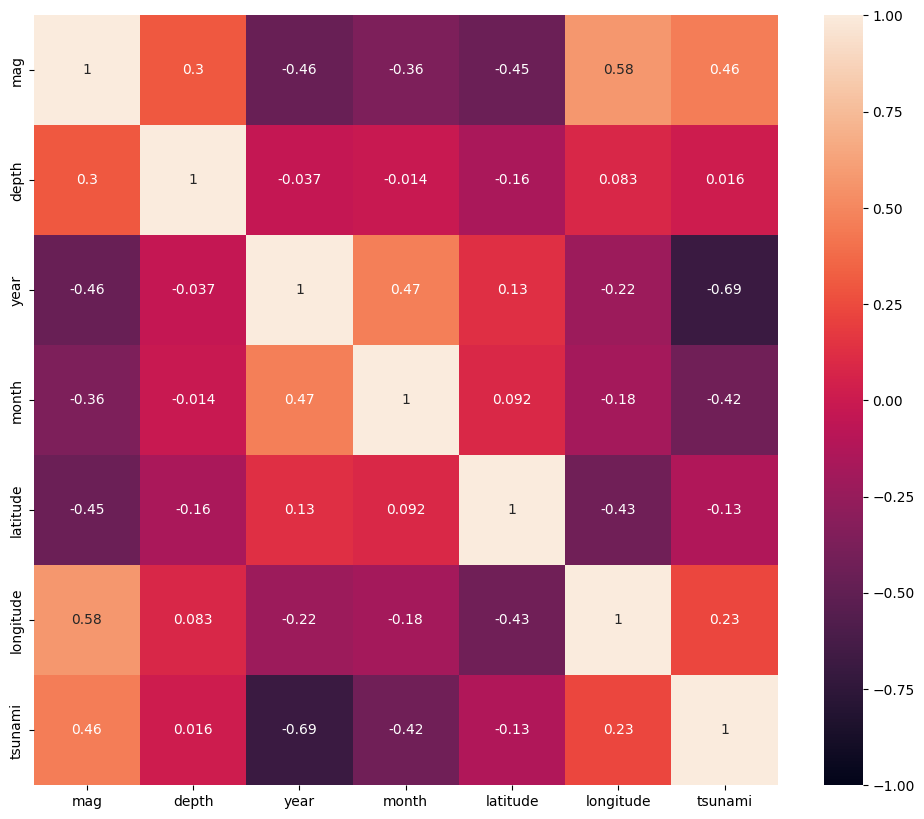

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

## Visualizing the distribution of features

In [28]:
num_columns.remove('tsunami')

In [29]:
scaler = StandardScaler()

standardized_df = pd.DataFrame(scaler.fit_transform(df_merged[num_columns].copy()), columns=num_columns)

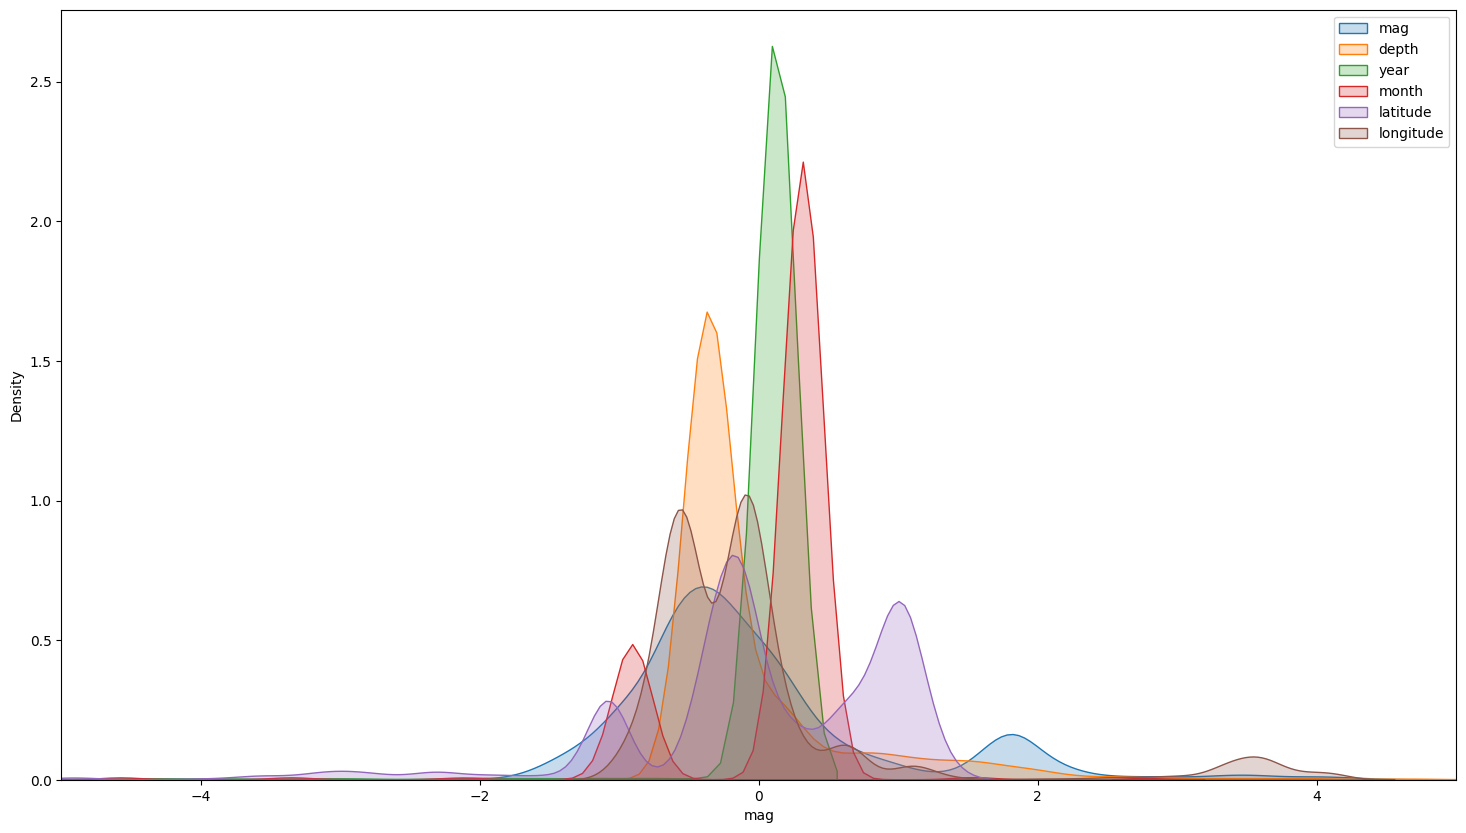

In [30]:
plt.figure(figsize=(18,10))
for column in num_columns:
    sns.kdeplot(standardized_df[column], fill=True, label=column)
plt.legend()
plt.xlim(-5,5)
plt.show()

# Encoding

In [31]:
df_merged

,mag,depth,place,year,month,latitude,longitude,tsunami
0,2.30,108.7,Alaska,2022,10,61.089900,-152.313200,0.0
1,0.30,4.9,California,2022,10,39.345100,-119.960300,0.0
2,1.90,40.5,Alaska,2022,10,53.485200,-165.266800,0.0
3,4.20,67.4,Philippines,2022,10,5.461800,126.631000,0.0
4,2.01,32.0,Hawaii,2022,10,19.188667,-155.397995,0.0
...,...,...,...,...,...,...,...,...
15719,5.30,14.0,Illinois,2008,4,38.452000,-87.886000,0.0
15720,6.80,39.0,Japan,2008,5,36.158000,141.521000,0.0
15721,7.60,19.0,Japan,2011,3,38.058000,144.590000,0.0
15722,8.30,22.0,Chile,2015,9,-31.573000,-71.674000,1.0


In [32]:
df_merged.place.unique()

array([' Alaska', ' California', ' Philippines', ' Hawaii', ' Nevada',
       'Nevada', ' Washington', 'California', ' Idaho', ' Oklahoma',
       ' New Mexico', ' Aleutian Islands, Alaska', ' Papua New Guinea',
       ' Italy', ' Texas', ' Fiji', ' Afghanistan',
       'Kermadec Islands region', 'Southern Alaska', ' Puerto Rico',
       ' Japan region', ' Tonga', ' Indonesia', ' Solomon Islands',
       'Southern Texas', ' Iran', ' Wyoming', ' U.S. Virgin Islands',
       ' Iceland', 'Solomon Islands', 'Mongolia-China border region',
       ' Peru', 'South Sandwich Islands region', 'Fiji region',
       'central Mid-Atlantic Ridge', 'Puerto Rico region', 'Wyoming',
       'south of the Fiji Islands', 'Colorado',
       'Chile-Argentina border region', ' Taiwan', 'West Chile Rise',
       'northern Alaska', 'Philippine Islands region', ' South Carolina',
       ' India', 'Central Alaska', 'Eritrea-Ethiopia border region',
       'near the coast of central Peru', ' India region',
      

One hot encoding function

In [34]:
def one_hot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [35]:
data = one_hot_encode(df_merged, ['place'], ['place'])
data

,mag,depth,year,month,latitude,longitude,tsunami,place_ Afghanistan,place_ Alaska,place_ Alaska region,...,place_south of the Mariana Islands,place_southeast Indian Ridge,place_southeast of the Loyalty Islands,place_southeastern Missouri,place_southern Idaho,place_southern Mid-Atlantic Ridge,place_west of Macquarie Island,place_western Indian-Antarctic Ridge,place_western Texas,place_western Xizang
0,2.30,108.7,2022,10,61.089900,-152.313200,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.30,4.9,2022,10,39.345100,-119.960300,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.90,40.5,2022,10,53.485200,-165.266800,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.20,67.4,2022,10,5.461800,126.631000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.01,32.0,2022,10,19.188667,-155.397995,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15719,5.30,14.0,2008,4,38.452000,-87.886000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15720,6.80,39.0,2008,5,36.158000,141.521000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15721,7.60,19.0,2011,3,38.058000,144.590000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15722,8.30,22.0,2015,9,-31.573000,-71.674000,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting and Scaling

In [36]:
y = data.tsunami
X = data.drop(columns='tsunami')

In [37]:
scaler = StandardScaler()

In [39]:
X = scaler.fit_transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Modelling and Training

In [44]:
import tensorflow as tf

In [41]:
X.shape

(15723, 264)

In [43]:
y.mean()

0.016345481142275648

In [47]:
inputs = tf.keras.Input(shape=(264,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

batch_size = 32
epochs = 30

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs, 
    callbacks=tf.keras.callbacks.ReduceLROnPlateau(),
    verbose=0
)

c:\Users\Auli\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


# Results

## AUC Curve

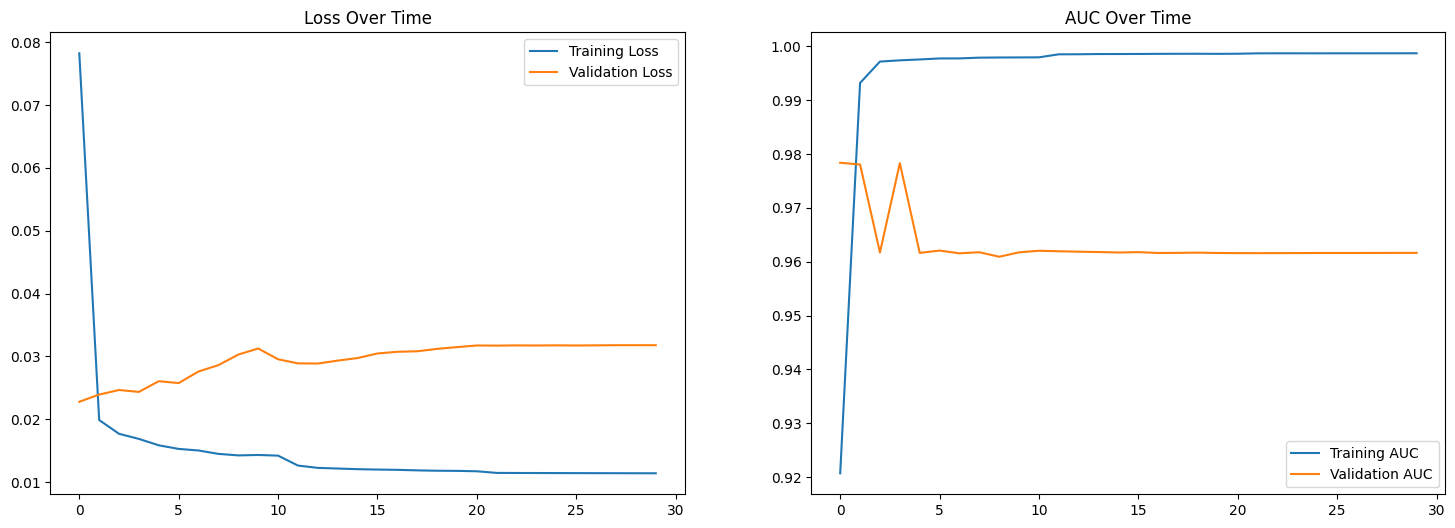

In [49]:
plt.figure(figsize=(18, 6))

epochs_range = range(epochs)
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_auc, label='Training AUC')
plt.plot(epochs_range, val_auc, label='Validation AUC')
plt.legend()
plt.title('AUC Over Time')
plt.show()

## Evaluate with test data score

In [50]:
model.evaluate(X_test, y_test)

148/148 [==============================] - 0s 987us/step - loss: 0.0346 - auc: 0.9709


[0.03456542640924454, 0.9709472060203552]

In [54]:
pred = model.predict(X_test)
result = np.where(pred > 0.5, 1, 0)
result

148/148 [==============================] - 0s 993us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [61]:
result_df = pd.DataFrame(result)
result_df.value_counts()

0    4627
1      90
dtype: int64

## Confusion Matrix

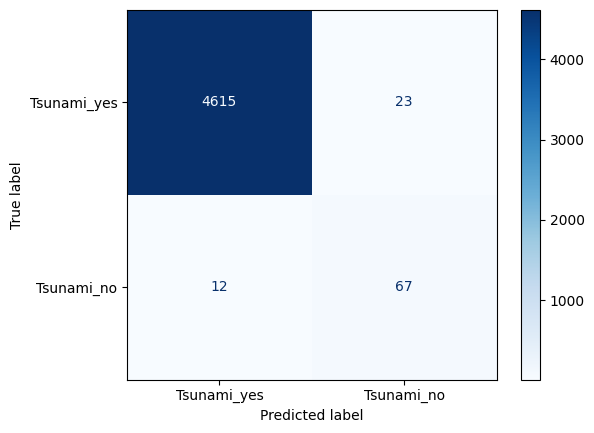

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


y_pred = result
labels = ["Tsunami_yes", "Tsunami_no"]

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

# Saving trained model

In [51]:
import joblib

joblib.dump(model, 'Tensorflow_keras')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\input_layer
......vars
...metrics\auc
......vars
.........0
.........1
.........2
.........3
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-11-30 11:24:31         2383
metadata.json                                  2022-11-30 11:24:31           64
variables.h5                                   2022-11-30 11:24:31       281464


['Tensorflow_keras']